# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,21,72
1,34,5
2,76,90
3,25,39
4,84,4


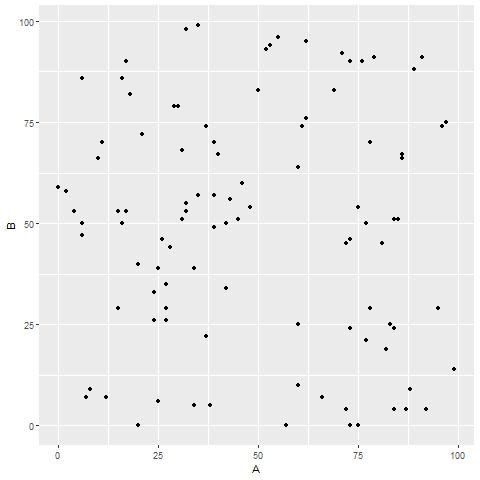

In [6]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [18]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(10)

# A tibble: 10 x 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 ~  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D~  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo~  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4


In [8]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




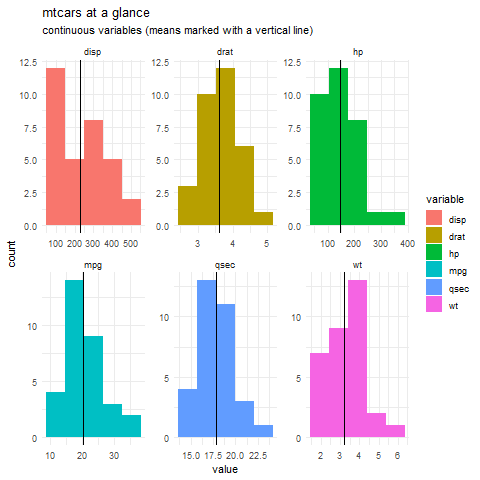

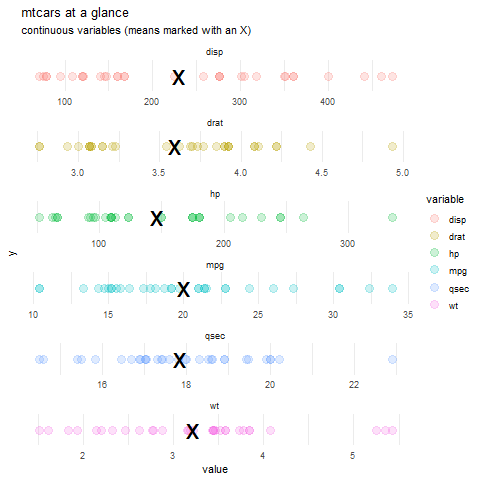

In [13]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

#plot_continuous

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

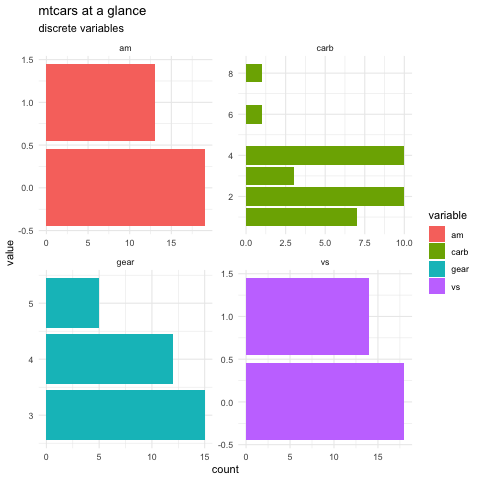

In [76]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

In [ ]:
# answer here

👉 What can we not conclude about this dataset from the charts above?

In [ ]:
# answer here

👉 What further questions about this data do you have now? 

In [ ]:
# answer here

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


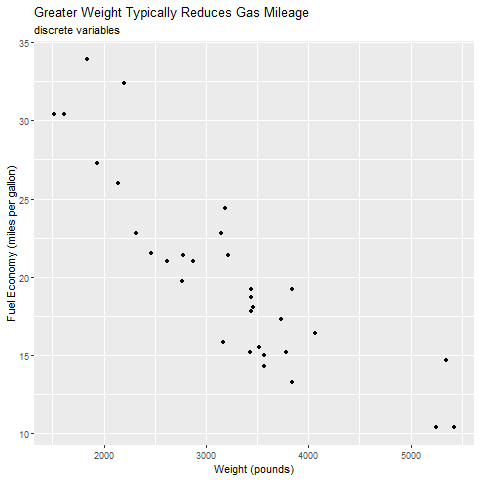

In [27]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt*1000) +
    geom_point() +
    labs(title = 'Greater Weight Typically Reduces Gas Mileage',
            subtitle='discrete variables',
            x = 'Weight (pounds)',
            y = 'Fuel Economy (miles per gallon)')

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    b. What can't we conclude about fuel efficiency and weight

    c. What further questions do you have about this data?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


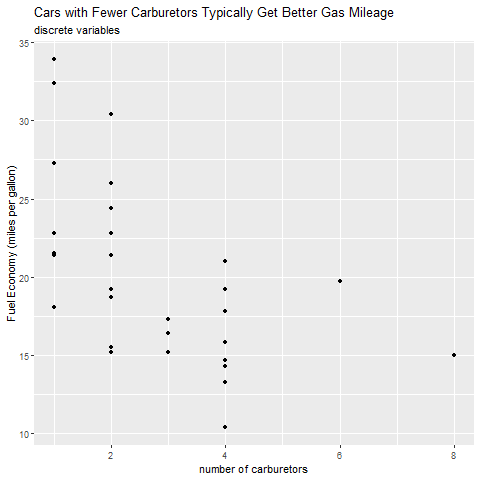

In [31]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=carb) +
    geom_point() +
    labs(title = 'Cars with Fewer Carburetors Typically Get Better Gas Mileage',
            subtitle='discrete variables',
            x = 'number of carburetors',
            y = 'Fuel Economy (miles per gallon)')

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

(replace the text in this cell with your question)

### 👉 Charts or summary statistics to help answer your question

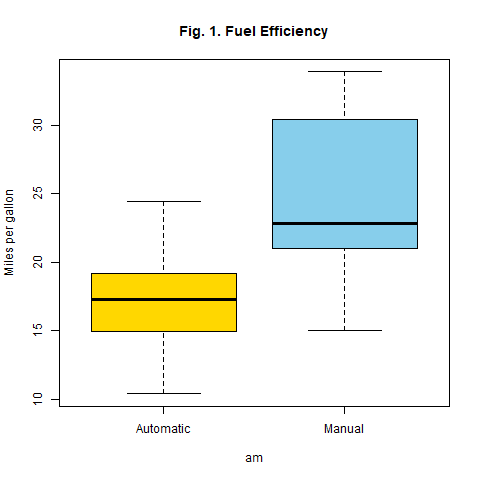

In [23]:
%%R 

# ggplot code here%%R

boxplot(mpg~am, data=mtcars, main ='Fig. 1. Fuel Efficiency',
        ylab='Miles per gallon',names=c("Automatic","Manual"),notch=FALSE, col=(c("gold","skyblue")))

### 👉 Reflection

a. What can we conclude?

b. What can't we conclude?

c. What further questions does this analysis raise?
